# Inverstigating a dataset - No Show Appointments 

### Describing the features of the data

###### dataset of 110.527 medical appointments and its 14 associated variables (characteristics). describe attendence of patients and if they show up or not and what features could affect that .

A person makes a doctor appointment, receives all the instructions and no-show. Who to blame?


14 variables
dataset can be accesed from here 
https://www.kaggle.com/joniarroba/noshowappointments


![alt text](images/data1.png "data description")


HANDCAP VALUE HAS BEEN CHANGED TO BE 4 VALUES . 

scholarship variable means this concept = https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia



### Introductions :  

#### Questions  :  

##### 1 - what is the rate of overall appointment show-up vs. no show-up ?  
##### 2 - what are the most feature that matter  most ('Age', 'being alcoholic','Having an SMS', 'Gender', 'Scholarship'), to make the patient show up or not?

### libraries we need

In [1]:
#import important Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

>checking for cleanliness, and then trim and clean the dataset for analysis.

### General Properties

In [2]:
# Load the data. 
df = pd.read_csv('KaggleV2-May-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Summary for the data

In [3]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


##### Checking for null values

In [4]:
(df.isnull()).all()


PatientId         False
AppointmentID     False
Gender            False
ScheduledDay      False
AppointmentDay    False
Age               False
Neighbourhood     False
Scholarship       False
Hipertension      False
Diabetes          False
Alcoholism        False
Handcap           False
SMS_received      False
No-show           False
dtype: bool

> as we can see there is no null values

### Looking for Data that need to be cleaned

> we will discus data cleaning process and we would focus on : 

1. remove null value and fortionelty we don't have here any missing data . 
2. remove duplicated values . 
3. check data type and fixing it .
4. fixing any unlogical values from data . 

In [5]:
# checking the info of the data (data types, null values etc..)
df.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:

# check if there is a dplicates in the data 
print("Num of dublicated : ", + sum(df.duplicated()))



Num of dublicated :  0


> as we can see from data descripe function that we have values of age with minus values so we would explore more about that .

In [7]:
df.query(" Age <= 0  ")

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
59,7.184428e+13,5638545,F,2016-04-29T08:08:43Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
63,2.366233e+14,5628286,M,2016-04-27T10:46:12Z,2016-04-29T00:00:00Z,0,SÃO BENEDITO,0,0,0,0,0,0,No
64,1.885174e+14,5616082,M,2016-04-25T13:28:21Z,2016-04-29T00:00:00Z,0,ILHA DAS CAIEIRAS,0,0,0,0,0,1,No
65,2.718818e+14,5628321,M,2016-04-27T10:48:50Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
67,8.647128e+13,5639264,F,2016-04-29T08:53:02Z,2016-04-29T00:00:00Z,0,NOVA PALESTINA,0,0,0,0,0,0,No
89,4.314932e+14,5640380,M,2016-04-29T10:37:02Z,2016-04-29T00:00:00Z,0,MONTE BELO,0,0,0,0,0,0,No
101,6.822847e+13,5642813,M,2016-04-29T17:24:19Z,2016-04-29T00:00:00Z,0,BONFIM,0,0,0,0,0,0,No
104,3.326985e+12,5632495,F,2016-04-28T08:04:48Z,2016-04-29T00:00:00Z,0,SANTO ANTÔNIO,0,0,0,0,0,0,Yes
132,8.468587e+14,5560742,M,2016-04-08T09:29:23Z,2016-04-29T00:00:00Z,0,PRAIA DO SUÁ,0,0,0,0,0,1,Yes
150,5.392419e+10,5641476,M,2016-04-29T13:43:34Z,2016-04-29T00:00:00Z,0,ITARARÉ,0,0,0,0,0,0,No



### Data Cleaning!

#### Fixing typos in data columns

In [8]:
df.rename(columns = {'Hipertension': 'Hypertension',
                'Handcap': 'Handicap','No-show':'No_show'}, inplace = True)


#### converting some columns that has date to a datetime datatype

> we can see that scheduleday data type is  non-null object which is incorrect data type and we must convert it to data time also appointmentday . 

In [9]:
# converting some columns that has date to a datetime datatype
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])



In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hypertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handicap          110527 non-null int64
SMS_received      110527 non-null int64
No_show           110527 non-null object
dtypes: datetime64[ns](2), float64(1), int64(8), object(3)
memory usage: 11.8+ MB


> fixing the ages that are less then 0 by taking the mean of all ages and put those values into it

In [11]:
# we fix any age has 0 or less values .
meanAge = df['Age'].mean()
df[df['Age'] <= 0] = meanAge


>Now we can check minimum value of age which is 1 and is logical 

In [12]:
min(df['Age'])

1.0

### convert no show data to 0 and 1 instead of 'yes' and 'no' . 1 means yes he didn't showed up

In [13]:
df.No_show[df['No_show'] == 'Yes'] = '1'
df.No_show[df['No_show'] == 'No'] = '0'
df['No_show'] = pd.to_numeric(df['No_show'])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [14]:
# create a mask for people who came
showed = df['No_show'] == 0
not_showed = df['No_show'] == 1
df['showed'] = showed
df['not_showed'] = not_showed



In [15]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,showed,not_showed
0,2.987250e+13,5642903.0,F,2016-04-29 18:38:08,2016-04-29 00:00:00,62.0,JARDIM DA PENHA,0.0,1.0,0.0,0.0,0.0,0.0,0.0,True,False
1,5.589978e+14,5642503.0,M,2016-04-29 16:08:27,2016-04-29 00:00:00,56.0,JARDIM DA PENHA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,False
2,4.262962e+12,5642549.0,F,2016-04-29 16:19:04,2016-04-29 00:00:00,62.0,MATA DA PRAIA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,False
3,8.679512e+11,5642828.0,F,2016-04-29 17:29:31,2016-04-29 00:00:00,8.0,PONTAL DE CAMBURI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,False
4,8.841186e+12,5642494.0,F,2016-04-29 16:07:23,2016-04-29 00:00:00,56.0,JARDIM DA PENHA,0.0,1.0,1.0,0.0,0.0,0.0,0.0,True,False


### let's now explore logical problem with data of appoitment and schedule 

> AppointmentDay must be after ScheduledDay so any data ScheduledDay >AppointmentDay  is wrong and not logical and must be removed from our data set .

In [16]:
len(df.query("ScheduledDay >AppointmentDay  "))

37159

#### we can see that we have 37159 value that seemes to be wrong and we would remove it . we would take values that ScheduledDay <AppointmentDay only . 


In [17]:
df = df.query("ScheduledDay <AppointmentDay  ")

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1  ( what is the rate of overall appointment show-up vs. no show-up ?)

###### we would see a pie chart of the percentage of who showed up and who  not

In [18]:
df['showed'].value_counts()

True     49894
False    19934
Name: showed, dtype: int64

71.452712379


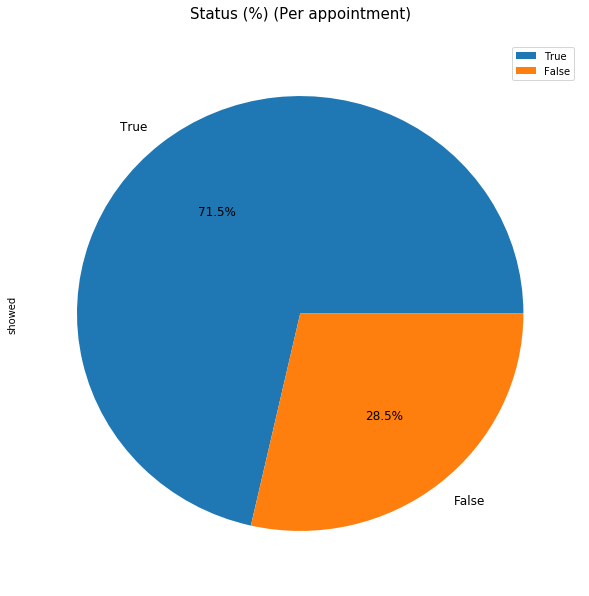

In [19]:
attend_t = df['showed'].value_counts()
print(attend_t[1] / attend_t.sum() * 100)
pieChart = attend_t.plot.pie(figsize=(10,10), autopct='%1.1f%%', fontsize = 12);
pieChart.set_title("Status" + ' (%) (Per appointment)\n', fontsize = 15);
plt.legend();


> we can see that 28.5 % of patients dosen't showup for their appointment

### Research Question 2 (what are the most feature that matter most ('Age', 'being alcoholic','Having an SMS', 'Gender', 'Scholarship'), to make the patient show up or not?)

In [20]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,showed,not_showed
5,9.598513e+13,5626772.0,F,2016-04-27 08:36:51,2016-04-29 00:00:00,76.0,REPÚBLICA,0.0,1.0,0.0,0.0,0.0,0.0,0.0,True,False
6,7.336882e+14,5630279.0,F,2016-04-27 15:05:12,2016-04-29 00:00:00,23.0,GOIABEIRAS,0.0,0.0,0.0,0.0,0.0,0.0,1.0,False,True
7,3.449833e+12,5630575.0,F,2016-04-27 15:39:58,2016-04-29 00:00:00,39.0,GOIABEIRAS,0.0,0.0,0.0,0.0,0.0,0.0,1.0,False,True
9,7.812456e+13,5629123.0,F,2016-04-27 12:48:25,2016-04-29 00:00:00,19.0,CONQUISTA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,False
10,7.345362e+14,5630213.0,F,2016-04-27 14:58:11,2016-04-29 00:00:00,30.0,NOVA PALESTINA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,False


#### print the average age of people who show up and people who didn't

In [21]:
df.query("showed==True")['Age'].mean()

41.201667535174572

In [22]:
df.query("showed==False")['Age'].mean()


35.862847396408149

###### making an histogram to see the realtion between the (age,alcoholic people, SMS recievers, Gender, Scholarship)  and the people who came to thier appointment

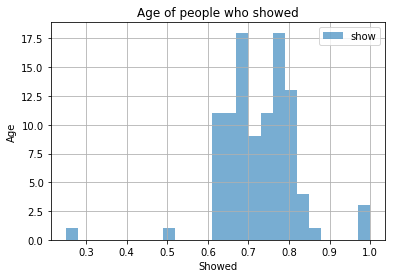

In [23]:
# using group by function to find relations between features 
# visualize the average of people who came + print the percentage

df.groupby('Age')['showed'].mean().hist(alpha=0.6,bins=25,label='show');
plt.xlabel("Showed")
plt.ylabel("Age")
plt.title("Age of people who showed")
plt.legend();

Alcoholism
0.0    0.716010
1.0    0.659166
Name: showed, dtype: float64


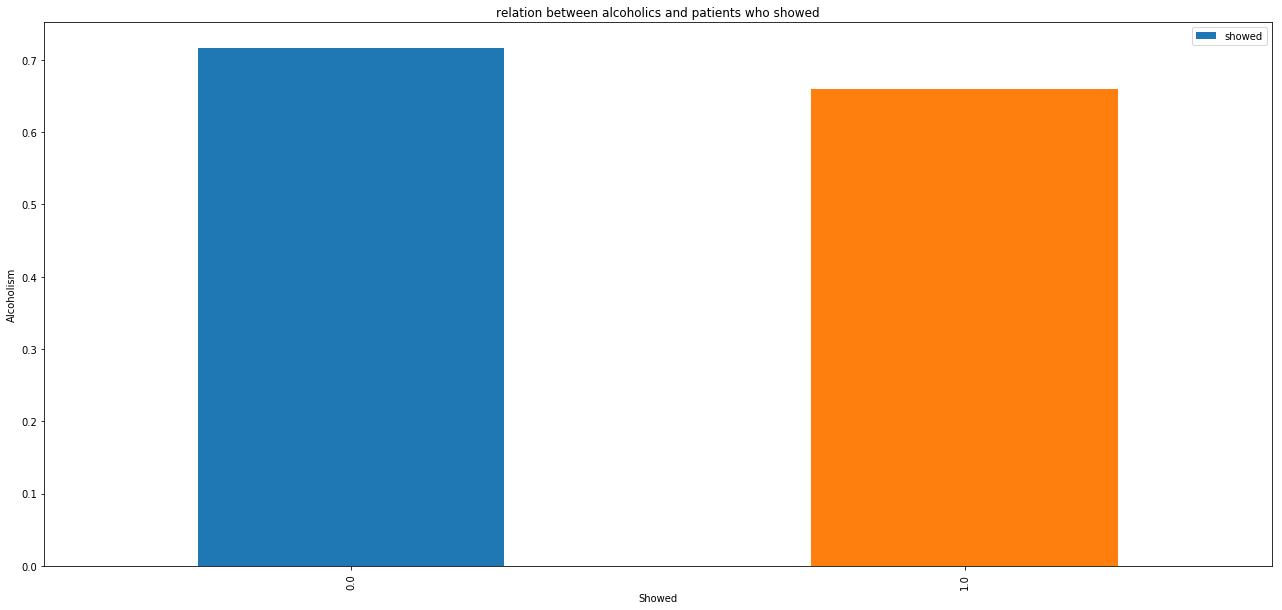

In [24]:
# using group by function to find relations between features
# and then see the relation between alcoholic people and people who showed up and who didn't
print(df.groupby('Alcoholism')['showed'].mean())
df.groupby('Alcoholism')['showed'].mean().plot(kind='bar',figsize=(22,10));
plt.xlabel("Showed")
plt.ylabel("Alcoholism")
plt.title("relation between alcoholics and patients who showed")
plt.legend();

SMS_received
0.0    0.705871
1.0    0.723348
Name: showed, dtype: float64


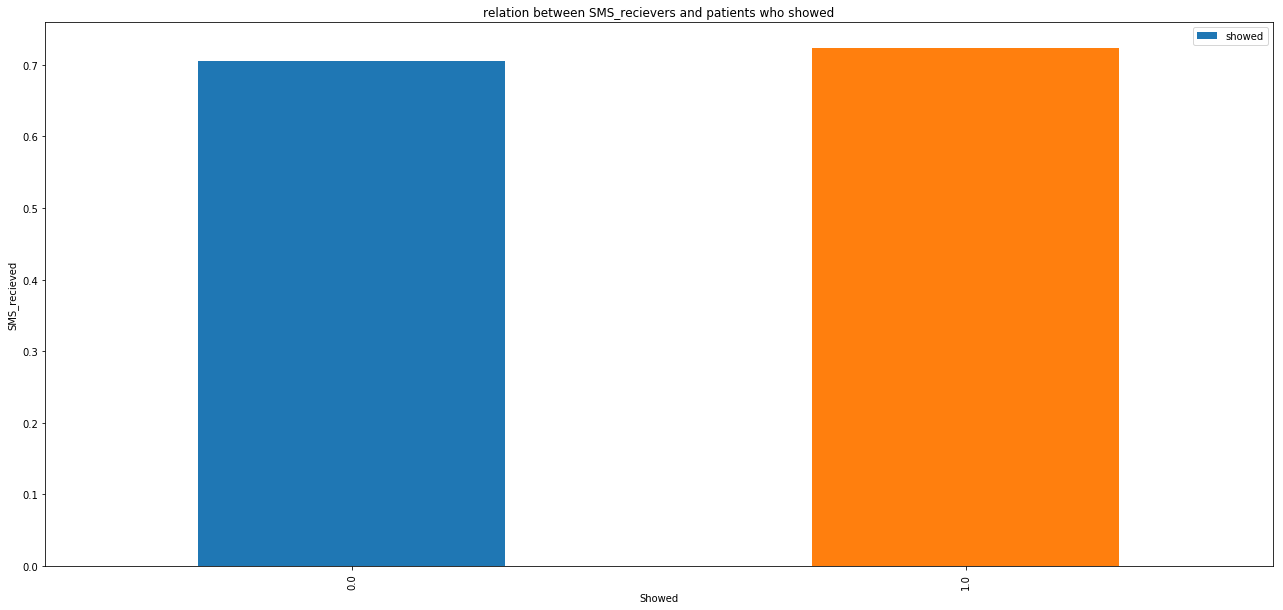

In [25]:
# using group by function to find relations between features
# and then see the relation between sms recievers and people who showed up and who didn't

print(df.groupby('SMS_received')['showed'].mean())
df.groupby('SMS_received')['showed'].mean().plot(kind='bar',figsize=(22,10));
plt.xlabel("Showed")
plt.ylabel("SMS_recieved")
plt.title("relation between SMS_recievers and patients who showed")
plt.legend();


Gender
F    0.715501
M    0.712519
Name: showed, dtype: float64


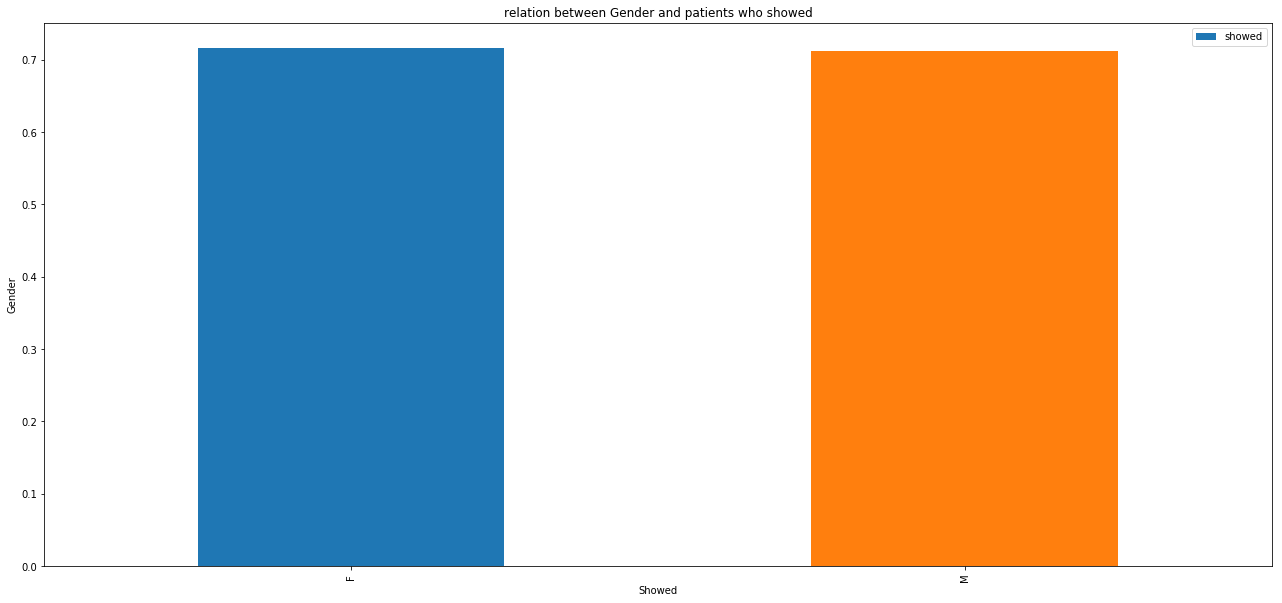

In [26]:
# using group by function to find relations between features
# and then see the relation between Gender and people who showed up and who didn't

print(df.groupby('Gender')['showed'].mean())
df.groupby('Gender')['showed'].mean().plot(kind='bar',figsize=(22,10));
plt.xlabel("Showed")
plt.ylabel("Gender")
plt.title("relation between Gender and patients who showed")
plt.legend() ;

###### completing the visualiztion to see what is the feature that affect patients to come.

Scholarship
0.0    0.721322
1.0    0.649910
Name: showed, dtype: float64


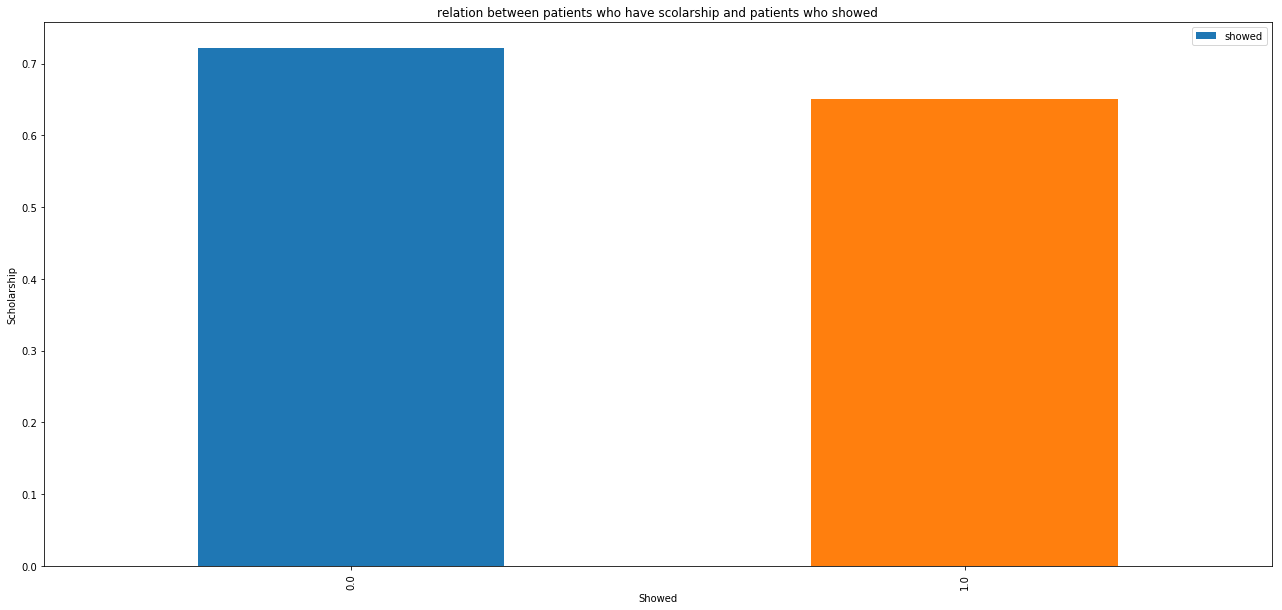

In [27]:
# using group by function to find relations between features
# and then see the relation between people who has scholarship and people who showed up and who didn't

print(df.groupby('Scholarship')['showed'].mean())
df.groupby('Scholarship')['showed'].mean().plot(kind = 'bar',figsize=(22,10))
plt.xlabel("Showed")
plt.ylabel("Scholarship")
plt.title("relation between patients who have scolarship and patients who showed")
plt.legend();

As we can see Age is the most factor that affect people who will attend or not!

## Limitations:

#### Missing features that could be useful to get more sure what is the most feature  impacting showing  the appointment like more information about patient medical status ,also  if the patient is employeed or not ,or whether the patient working days in the week.

#### also I think that process of collecting this data isn't good as we removed about half of the data . 


<a id='conclusions'></a>
## Conclusions
• As we can see sending an SMS for the appiontment is not neccessary the right option to make sure that the patient will come  

• As we can see in our investigation the Age is the most important factor that decided if a patient would come or not the average of age for people who will be most likely to show up is 41.201667535174572 , and the average age for people who are not likely to show up is 35.862847396408149.  



• As we can see about 28.5% of people that schedule an appointment did not make it to thier appointment  

• As we can see most of people who has Scholarship are most likely to miss thier appointments with a percentage of 64.99% of showing and patients who don't have a scholarship have the percentage 72.13%


• the features such as different gender or alcoholic is not a factor to decide if the person would come to his appointment or not!  


#### finally : all of this conclusions applies only to a analyzed dataset . statistical analysis wan't carried out to verify  weather this assumptions is true or not . 

  
  
## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [29]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0